In [418]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [419]:
df=pd.read_csv('DB.csv')


In [420]:
df['magnitude'] = pd.to_numeric(df['magnitude'], errors='coerce')
df['depth'] = pd.to_numeric(df['depth'], errors='coerce')
df['category'] = df['category'].astype(str).str.lower()
df['source'] = df['source'].astype(str)

In [421]:
mag_limit = 5.0          
depth_limit = 70.0


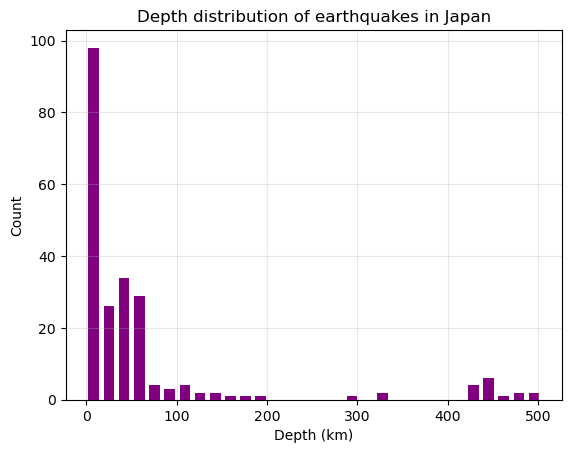

In [422]:
plt.hist(df['depth'], bins=30, color='purple', rwidth=0.7)
plt.xlabel("Depth (km)")
plt.ylabel("Count")
plt.title("Depth distribution of earthquakes in Japan")
plt.grid(True, alpha=0.3)
plt.show()

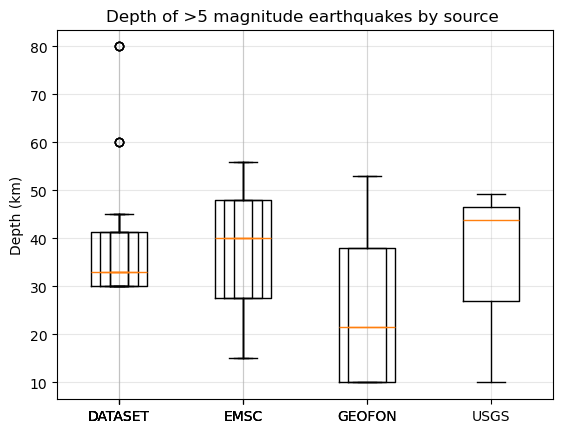

Average depth of >5 magnitude earthquakes by source:
 Source  Average Depth (km)
DATASET                39.7
   EMSC                37.0
 GEOFON                26.5
   USGS                34.4


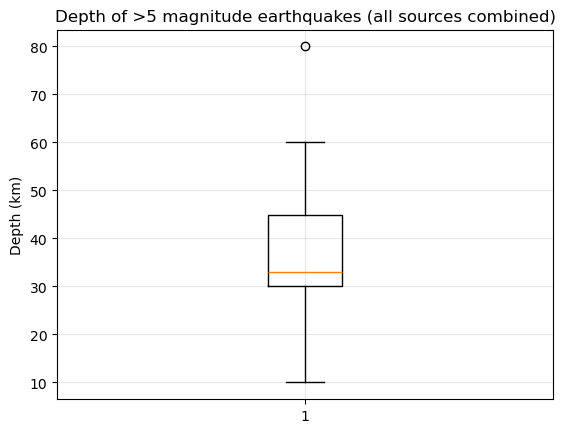

Average depth for >5 magnitude earthquakes >>> 36.2 km


In [423]:
strong = df[(df['magnitude'] >= 5.0)]

#for src in df['source'].unique():
    #subset = strong[strong['source'] == src]

   # plt.boxplot(subset['depth'], tick_labels=[src])
    #plt.ylabel("Depth (km)")
   # plt.title(f"Depth of 5.0 ≤ magnitude < 7.0 earthquakes - {src}")
   # plt.grid(True, alpha=0.3)
   # plt.show()

data_to_plot = []
sources = []

for src, group in strong.groupby('source'):
    data_to_plot.append(group['depth'].values)
    sources.append(src)
    plt.boxplot(data_to_plot, tick_labels=sources)

plt.ylabel("Depth (km)")
plt.title("Depth of >5 magnitude earthquakes by source ")
plt.grid(True, alpha=0.3)
plt.show()
print("Average depth of >5 magnitude earthquakes by source:")
result = strong.groupby('source')['depth'].mean().round(1).reset_index()
result.columns = ['Source', 'Average Depth (km)']
print(result.to_string(index=False))
plt.boxplot(strong['depth'].values)
plt.ylabel("Depth (km)")
plt.title("Depth of >5 magnitude earthquakes (all sources combined)")
plt.grid(True, alpha=0.3)
plt.show()

avg_depth = strong['depth'].mean().round(1)
print(f"Average depth for >5 magnitude earthquakes >>> {avg_depth} km")






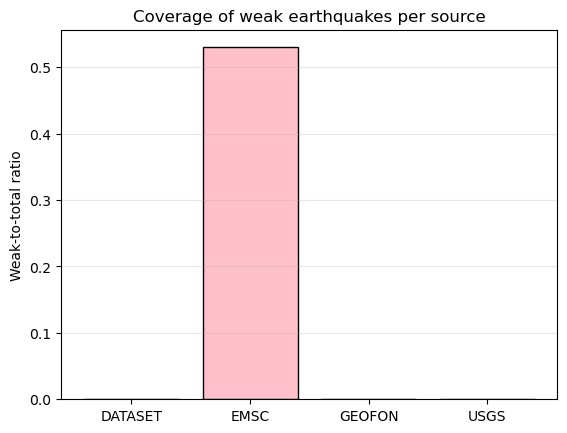

 Source  Weak-to-Total Ratio
DATASET                 0.00
   EMSC                 0.53
 GEOFON                 0.00
   USGS                 0.00


In [424]:
total = df.groupby('source').size()
weak = df[df['category'].str.lower() == 'weak'].groupby('source').size()

ratio = (df[df['category'].str.lower() == 'weak'].groupby('source').size() /
         df.groupby('source').size()).fillna(0).round(2)

plt.bar(ratio.index, ratio.values, color='pink', edgecolor='black')
plt.ylabel("Weak-to-total ratio")
plt.title("Coverage of weak earthquakes per source")
plt.grid(True, axis='y', alpha=0.3)
plt.show()


result = ratio.reset_index()
result.columns = ['Source', 'Weak-to-Total Ratio']
print(result.to_string(index=False))

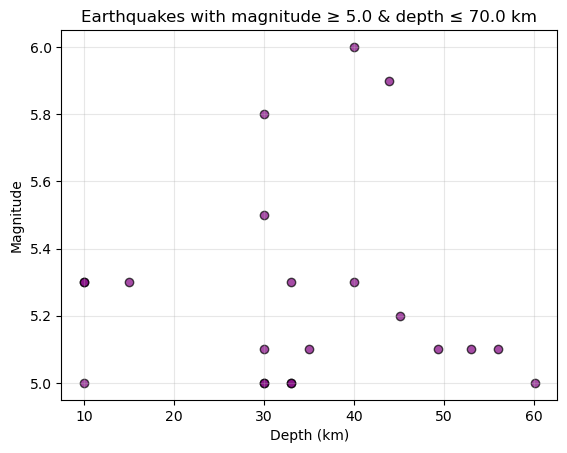

Top 10 high-magnitude and shallow earthquakes:


,time,region,magnitude,depth,source,dist_to_Tokyo
1,2025-10-04 15:21:08,NEAR EAST COAST OF HONSHU,6.0,40.000,EMSC,257.48
2,2025-10-04 15:21:09,Tomioka,5.9,43.855,USGS,260.32
3,2025-10-09 09:05:00,Tokyo,5.8,30.000,DATASET,4.04
4,2025-09-19 05:00:00,Tokyo,5.5,30.000,DATASET,4.04
5,2025-10-07 21:38:37,Tatsugō,5.3,10.000,USGS,1202.04
6,2025-10-07 21:38:38,Ryukyu Islands,5.3,10.000,GEOFON,1213.31
7,2025-10-07 21:38:39,RYUKYU ISLANDS,5.3,15.000,EMSC,1207.96
8,2025-10-07 11:30:00,Yamaguchi,5.3,33.000,DATASET,766.85
9,2025-09-27 15:30:00,Tokyo,5.3,40.000,DATASET,4.04
10,2025-09-21 02:15:46,Osaka,5.2,45.100,DATASET,392.42


In [425]:
MAG_LIMIT = 5.0
DEPTH_LIMIT = 70.0

risky = df[(df['magnitude'] >= MAG_LIMIT) & (df['depth'] <= DEPTH_LIMIT)]
top10 = risky.sort_values(by=['magnitude', 'depth'], ascending=[False, True]).head(10)

plt.scatter(risky['depth'], risky['magnitude'], alpha=0.7, color='purple', edgecolor='black')
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title(f"Earthquakes with magnitude ≥ {MAG_LIMIT} & depth ≤ {DEPTH_LIMIT} km")
plt.grid(True, alpha=0.3)
plt.show()

print("Top 10 high-magnitude and shallow earthquakes:")
top10[['time', 'region', 'magnitude', 'depth', 'source', 'dist_to_Tokyo']].set_index(pd.Index(range(1, 11)))


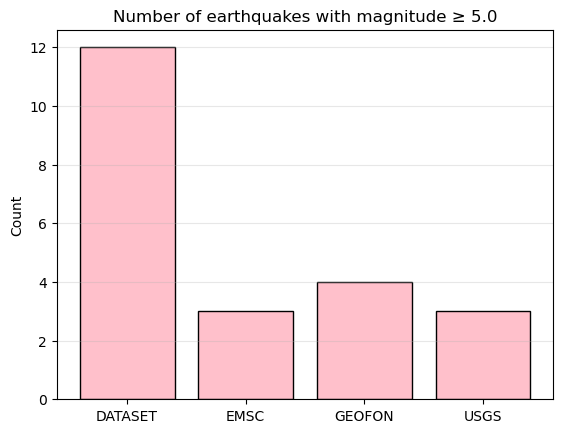

 Source  Count of large earthquakes
DATASET                          12
   EMSC                           3
 GEOFON                           4
   USGS                           3


In [ ]:
MAG_LIMIT = 5.0


big = df[df['magnitude'] >= MAG_LIMIT]
big_count = big.groupby('source').size()


plt.bar(big_count.index, big_count.values, color='pink', edgecolor='black')
plt.ylabel("Count")
plt.title(f"Number of earthquakes with magnitude ≥ {MAG_LIMIT}")
plt.grid(True, axis='y', alpha=0.3)
plt.show()


result = big_count.reset_index()
result.columns = ['Source', 'Count of large earthquakes']
print(result.to_string(index=False))

